In [ ]:
#Installing opencv library
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
#Reading an Image
import cv2
img = cv2.imread(r"/content/IMG.jpg",0)

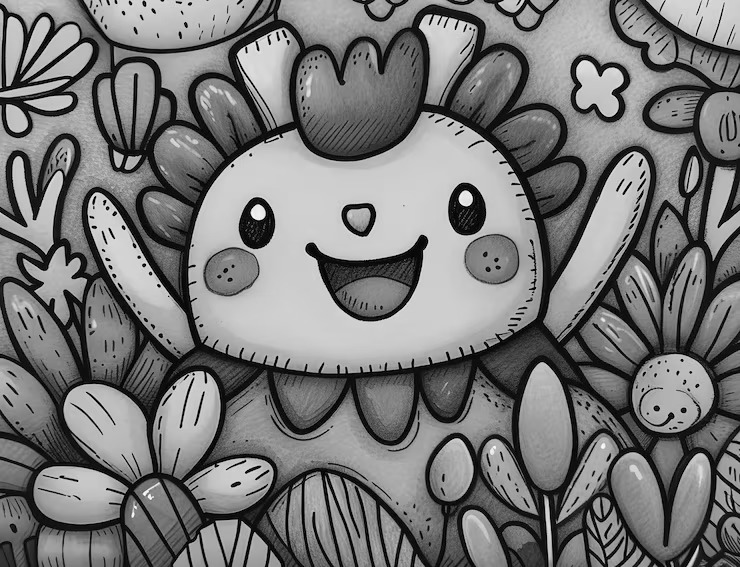

In [ ]:
#Display an Image - using Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
#adding Gaussian noise image
def add_gaussian_noise(image_path, mean=0, var=100):
    sigma = var ** 0.5  # Standard deviation is the square root of variance

    # Generate Gaussian noise with the same shape as the image
    gaussian_noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)

    # Add the noise to the image
    noisy_image = img.astype(np.float32) + gaussian_noise

    # Clip values to stay within valid pixel range (0-255) and convert back to uint8
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

noisy_img = add_gaussian_noise(img, mean=10, var=500)

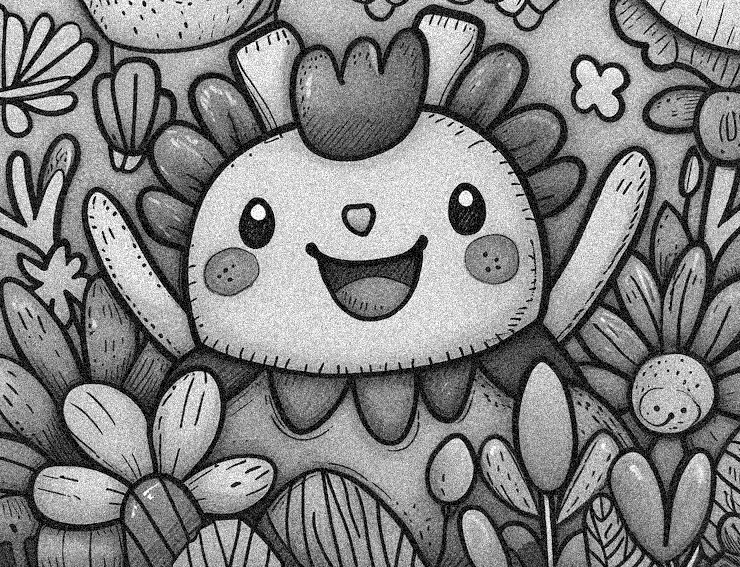

In [ ]:
cv2_imshow(noisy_img)

In [ ]:
# Obtain number of rows and columns
row,col = img.shape

In [ ]:
print("Rows of image is : ",row)
print("Columns of image is : ",col)

Rows of image is :  567
Columns of image is :  740


In [ ]:
# Develop Averaging filter(3, 3) mask
mask = np.ones([3,3], dtype = int)
mask = mask / 9
print("Averaging mask is : \n",mask)

Averaging mask is : 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
#Second mask
mask2 = np.array([[1,1,1],[1,2,1],[1,1,1]])
mask2 = mask / 10
print("Averaging mask is : \n",mask2)

Averaging mask is : 
 [[0.01111111 0.01111111 0.01111111]
 [0.01111111 0.01111111 0.01111111]
 [0.01111111 0.01111111 0.01111111]]


Original image is : 


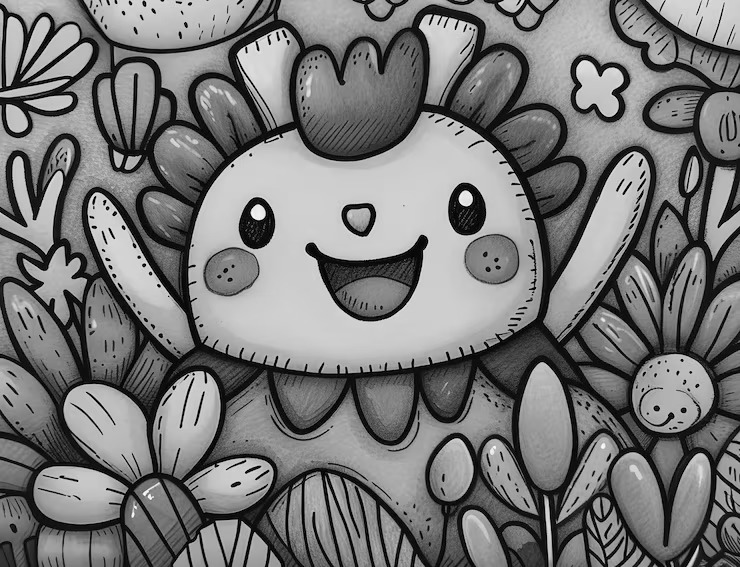

Image with Gaussian Noise : 


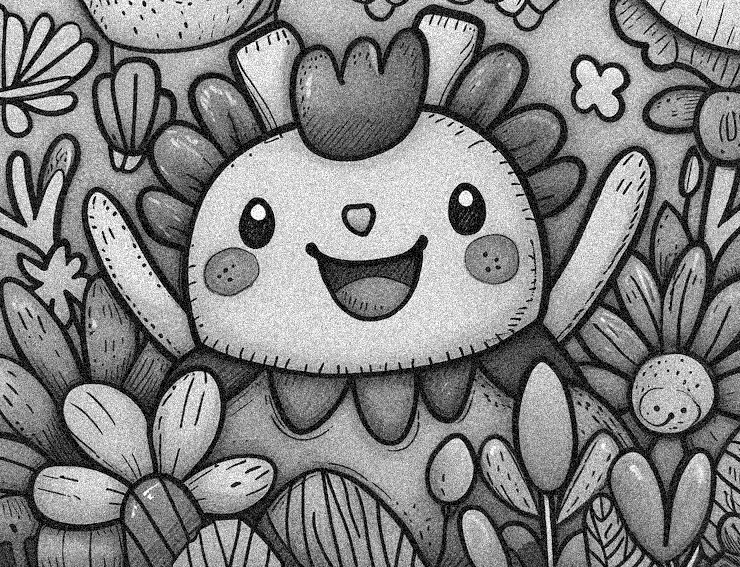

Filtered image is : 


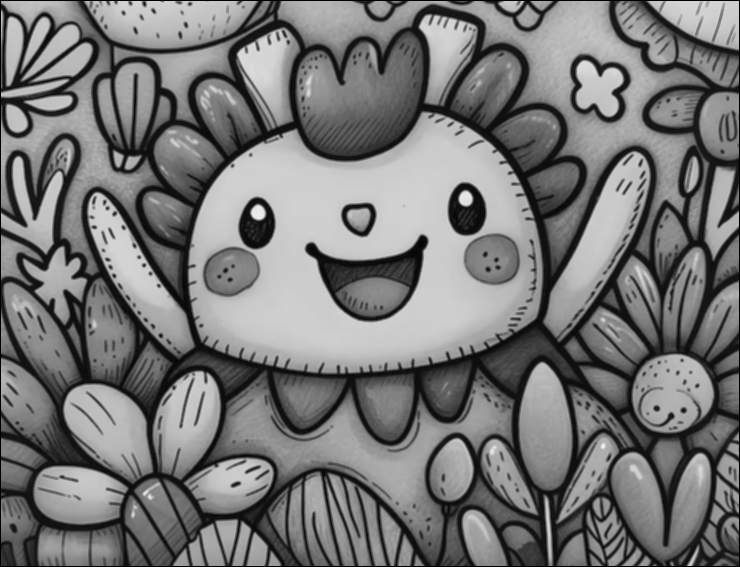

In [ ]:
# Convolve the 3X3 mask over the image -> Averaging filter
filtered_image = np.zeros([row, col])

for i in range(1,row-1):
  for j in range(1,col-1):
    temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
    filtered_image[i, j]= temp

print("Original image is : ")
cv2_imshow(img)
print("Image with Gaussian Noise : ")
cv2_imshow(noisy_img)
print("Filtered image is : ")
cv2_imshow(filtered_image)

Original image is : 


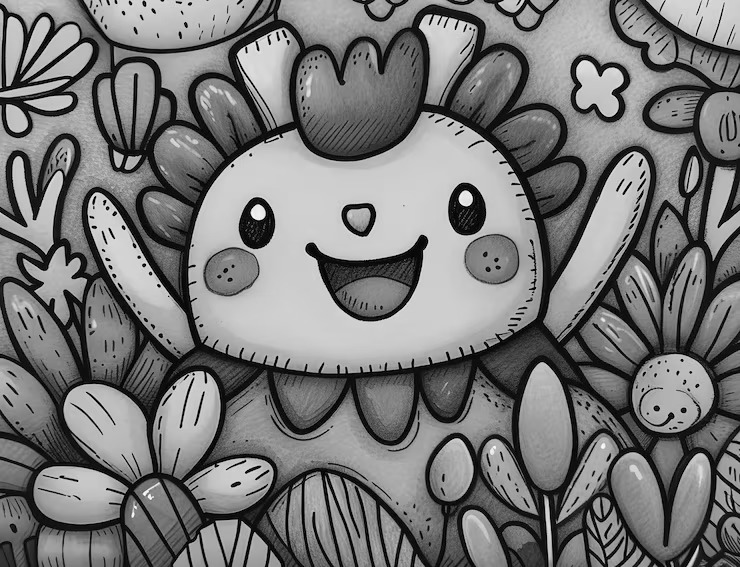

Image with Gaussian Noise : 


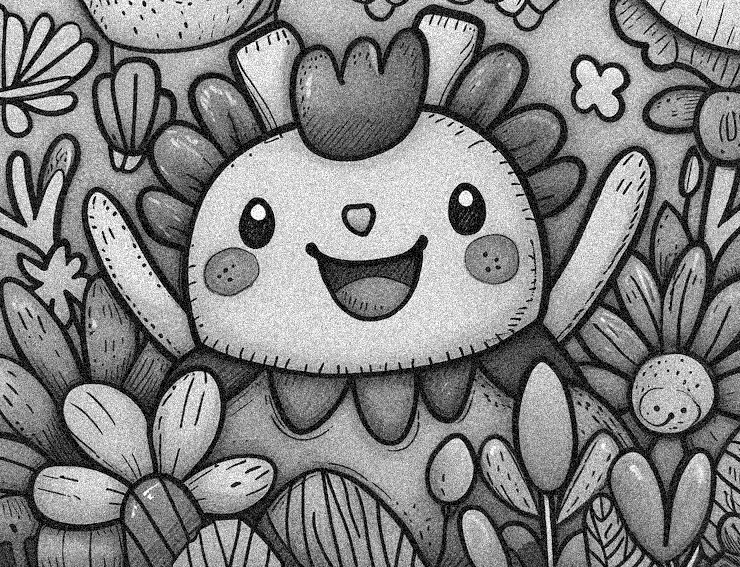

Filtered image is : 


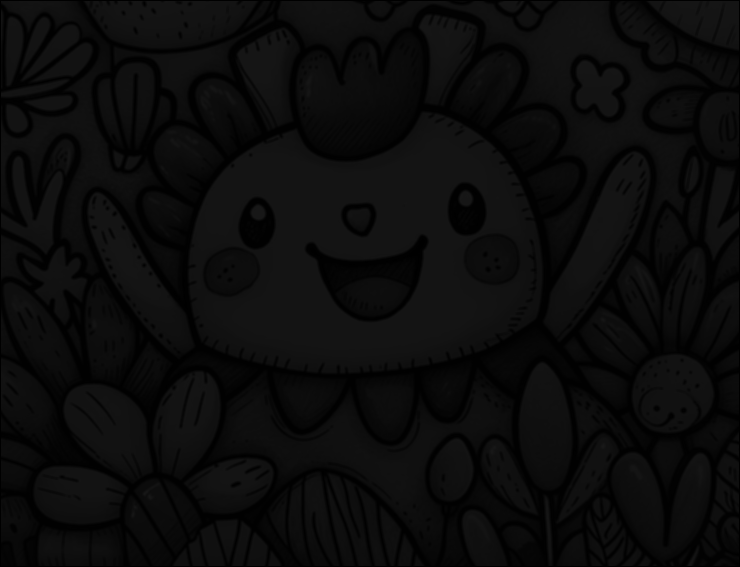

In [ ]:
# Convolve the 3X3 second mask over the image -> Averaging filter
filtered_image = np.zeros([row, col])

for i in range(1,row-1):
  for j in range(1,col-1):
    temp = img[i-1, j-1]*mask2[0, 0]+img[i-1, j]*mask2[0, 1]+img[i-1, j + 1]*mask2[0, 2]+img[i, j-1]*mask2[1, 0]+ img[i, j]*mask2[1, 1]+img[i, j + 1]*mask2[1, 2]+img[i + 1, j-1]*mask2[2, 0]+img[i + 1, j]*mask2[2, 1]+img[i + 1, j + 1]*mask2[2, 2]
    filtered_image[i, j]= temp

print("Original image is : ")
cv2_imshow(img)
print("Image with Gaussian Noise : ")
cv2_imshow(noisy_img)
print("Filtered image is : ")
cv2_imshow(filtered_image)

# ***ADDING SALT AND PEPPER NOISE IN IMAGE - ELIMINATING USING MEDIAN FILTER***

In [ ]:
print("Minimum pixel value:", np.min(img))
print("Maximum pixel value:", np.max(img))

Minimum pixel value: 0
Maximum pixel value: 253


Original Image is :


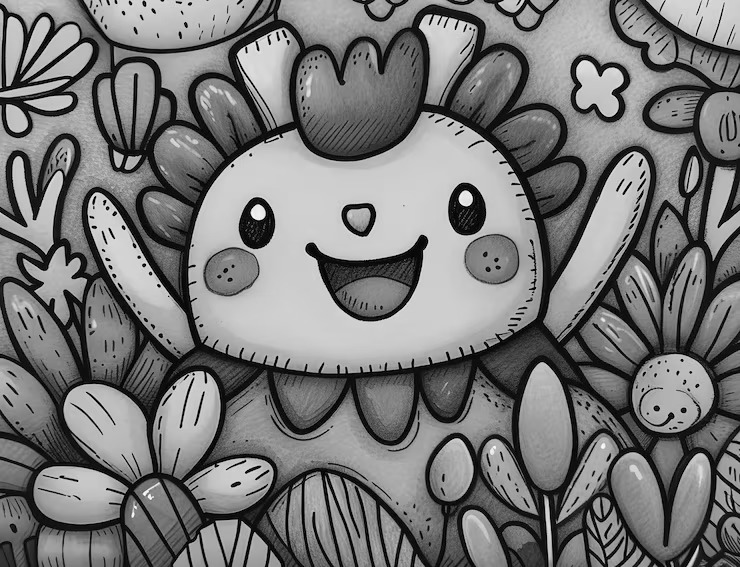

Noisy Image is :


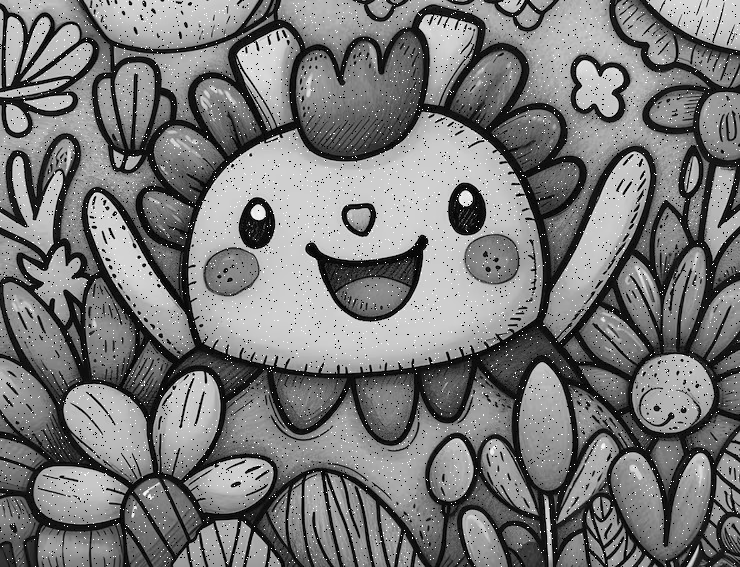

In [ ]:
import random

number_of_pixels = random.randint(300, 10000)
noisy_img = img.copy()
#Adding pepper noise
for i in range(number_of_pixels):
  y_coord = random.randint(0,row-1)
  x_coord = random.randint(0,col-1)
  noisy_img[y_coord][x_coord] = 255

#Adding salt noise
for i in range(number_of_pixels):
  y_coord = random.randint(0,row-1)
  x_coord = random.randint(0,col-1)
  noisy_img[y_coord][x_coord] = 0

print("Original Image is :")
cv2_imshow(img)
print("Noisy Image is :")
cv2_imshow(noisy_img)

Noisy image is : 


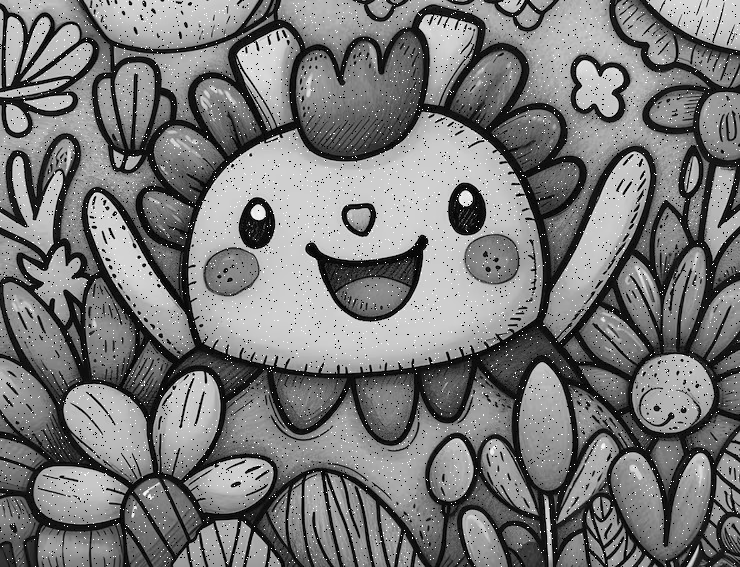

Filtered image is : 


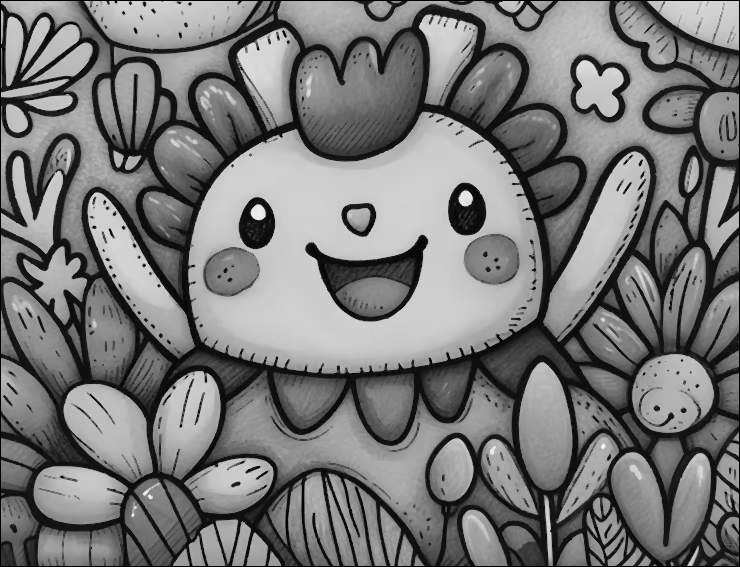

In [ ]:
filtered_image_median = np.zeros([row, col])
for i in range(1,row-1):
  for j in range(1,col-1):
    temp = np.median(noisy_img[i-1:i+2, j-1:j+2])
    filtered_image_median[i, j]= temp

print("Noisy image is : ")
cv2_imshow(noisy_img)
print("Filtered image is : ")
cv2_imshow(filtered_image_median)
